In [31]:
import pandas as pd

In [33]:
wages_df = pd.read_csv('Wages 2020Census.csv')

##  Display dataset summary

In [36]:
# Display dataset summary
print(wages_df.info())  # Overview of columns and missing values
print(wages_df.describe())  # Summary statistics

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4365 entries, 0 to 4364
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          4365 non-null   int64 
 1   Sex                          4365 non-null   object
 2   Marital_status               4365 non-null   object
 3   Number_of_children           4365 non-null   object
 4   Family_size                  4365 non-null   int64 
 5   Education-degree_recode      4365 non-null   object
 6   Education-degree_recode 2    4365 non-null   object
 7   Education                    4365 non-null   object
 8   Race_ethnicity-multi_recode  4365 non-null   object
 9   Immigrate-year               4365 non-null   int64 
 10  Birthplace_recode            4365 non-null   object
 11  Speaks_English               4365 non-null   object
 12  Employment_status            4365 non-null   object
 13  Income-wages                 4365

## (a) Typical Yearly Income

In [39]:
mean_income = wages_df['Income-wages'].mean()
median_income = wages_df['Income-wages'].median()
print(f"Mean Income: ${mean_income:,.2f}")
print(f"Median Income: ${median_income:,.2f}")

Mean Income: $58,704.16
Median Income: $41,000.00


## (b) Variability Check

In [42]:
std_dev_income = wages_df['Income-wages'].std()
iqr_income = wages_df['Income-wages'].quantile(0.75) - wages_df['Income-wages'].quantile(0.25)
print(f"Standard Deviation: ${std_dev_income:,.2f}")
print(f"IQR: ${iqr_income:,.2f}")

Standard Deviation: $68,338.06
IQR: $49,000.00


##  Visualize Income Distribution

In [45]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

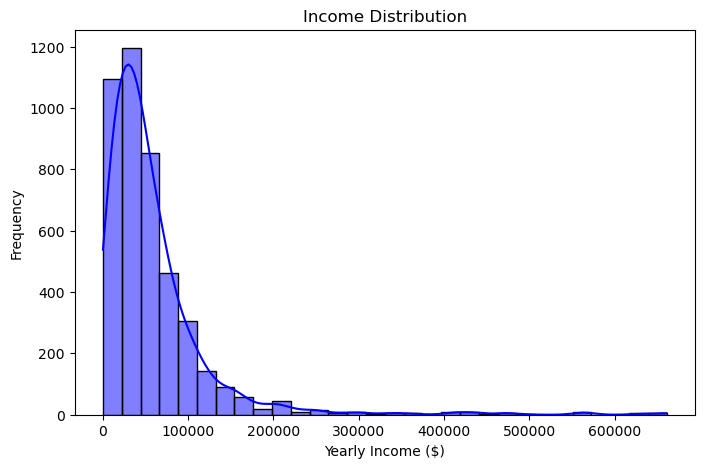

In [49]:
plt.figure(figsize=(8, 5))
sns.histplot(wages_df['Income-wages'], bins=30, kde=True, color='blue')
plt.title("Income Distribution")
plt.xlabel("Yearly Income ($)")
plt.ylabel("Frequency")
plt.show()

## Visualize Income Distribution

In [52]:
print("If no variability:")
print(f"Standard Deviation: 0")
print(f"IQR: 0")

If no variability:
Standard Deviation: 0
IQR: 0


 ## (d) Central Tendency Measures if No Variability


In [55]:
constant_income = wages_df['Income-wages'].mean()  # Assuming the constant is the mean
print(f"Mean, Median, Q1, Q3, Min, Max: ${constant_income:,.2f}")##

Mean, Median, Q1, Q3, Min, Max: $58,704.16


##  (e) Bivariate Analysis
# Boxplot: Income vs Education Level

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3632\508526054.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Education-degree_recode', y='Income-wages', data=wages_df, palette='Set2')


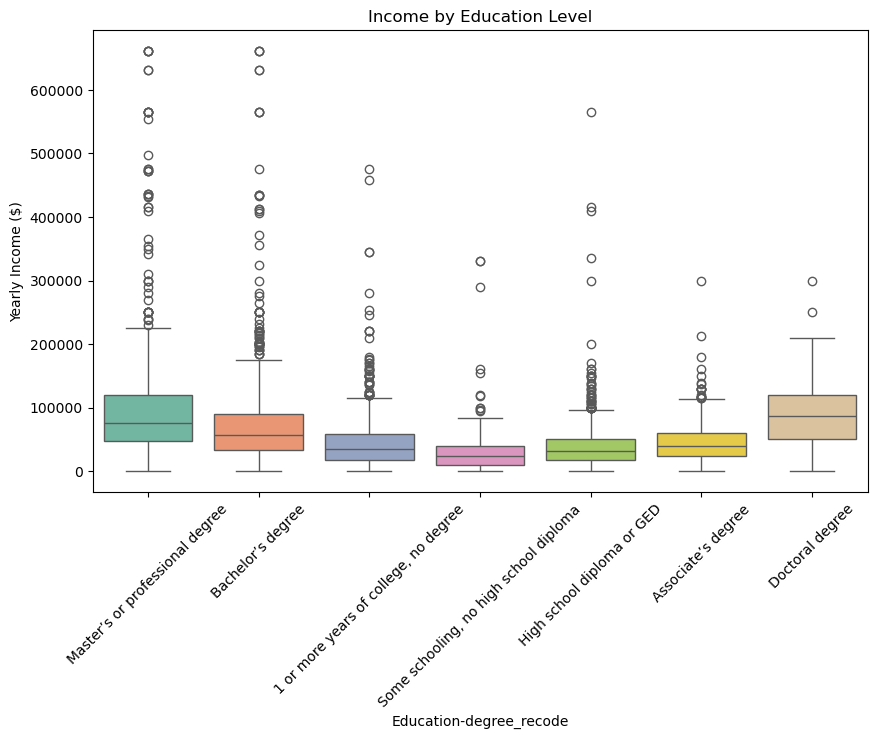

In [59]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Education-degree_recode', y='Income-wages', data=wages_df, palette='Set2')
plt.title("Income by Education Level")
plt.xticks(rotation=45)
plt.ylabel("Yearly Income ($)")
plt.show()

## Boxplot: Income vs Region

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3632\351924721.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region_recode', y='Income-wages', data= wages_df, palette='Set3')


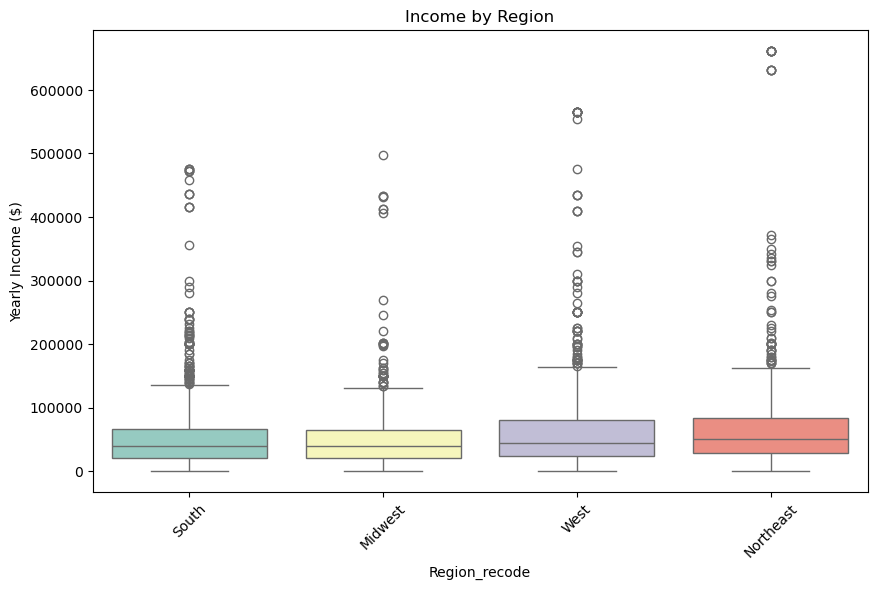

In [62]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_recode', y='Income-wages', data= wages_df, palette='Set3')
plt.title("Income by Region")
plt.xticks(rotation=45)
plt.ylabel("Yearly Income ($)")
plt.show()

##  QN 2

## no 3(a)

## 1 Import Libraries: Import necessary libraries such as pandas, numpy, and scikit-learn.

## python

##    import pandas as pd
##    from sklearn.model_selection import train_test_split
##    from sklearn.linear_model import LinearRegression
##   from sklearn.metrics import mean_squared_error

## 2 Load and Explore Data: Load the dataset into a DataFrame and inspect its structure.

## 3 Preprocess Data:

 ##    Handle missing values.
##     Encode categorical variables if necessary.
## 4 Split Data: Divide the dataset into training and testing sets using train_test_split.

## 5 Train the Model: Instantiate and fit the LinearRegression model using the training data.

## 6 Evaluate the Model: Use metrics like MSE or R-squared to assess model performance on the test set.



## (b) What assumptions does linear regression take into consideration? 


## Linearity: The relationship between the independent and dependent variables is linear.

## Independence: Observations are independent of each other.

## Homoscedasticity: The variance of residuals (errors) is constant across all levels of the independent variables.

## Normality: Residuals are normally distributed.

## No Multicollinearity: Independent variables are not highly correlated.



## (c)

In [81]:
from sklearn.model_selection import train_test_split

In [83]:


df = pd.read_csv('Wages 2020Census.csv')  

# Assume 'income' is target and 'age' is feature
X = df[['Age']]
y = df['Income-wages']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients
b0 = model.intercept_
b1 = model.coef_[0]

print(f"Equation: y = {b0:.2f} + {b1:.2f}x")


Equation: y = 20242.34 + 939.96x


## (d)  Compute the Mean Absolute Error (MSE) from your model 

In [87]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse:.2f}")

MSE: 3337808440.80


## (e) Extract and interpret the key outputs from a linear regression model

In [91]:
r_squared = model.score(X_test, y_test)
print(f"Intercept (b0): {b0:.2f}")
print(f"Coefficient (b1): {b1:.2f}")
print(f"R-squared: {r_squared:.2f}")

Intercept (b0): 20242.34
Coefficient (b1): 939.96
R-squared: 0.03


## Intercept (b0): The predicted value of y when x is 0.
## Coefficient (b1): The change in y for a one-unit increase in x.
## R-squared: The proportion of variance in y explained by x

## (e)

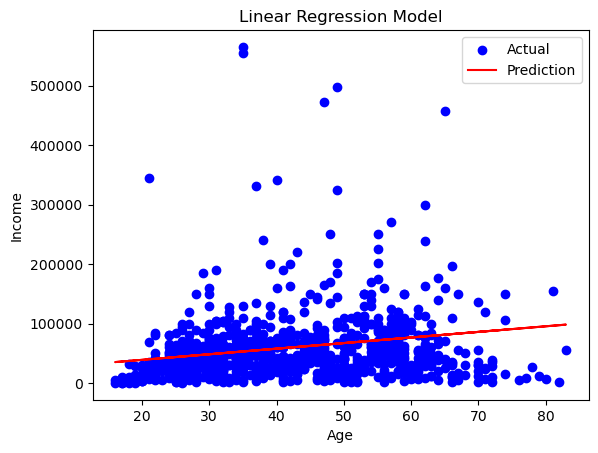

In [94]:
import matplotlib.pyplot as plt

plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Prediction')
plt.title('Linear Regression Model')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()


## BONUS QN 4

In [5]:
import numpy as np

## (a) Multiply a 5x3 matrix by a 3x2 matrix.

In [8]:
x = np.random.rand(5, 3)
y = np.random.rand(3, 2)
c = np.dot(x, y)
print(c)

[[0.70274248 0.83764243]
 [0.59827709 0.52804201]
 [0.51009438 0.65486916]
 [0.30473902 0.66318985]
 [0.1423511  0.36935502]]


## (b) Create a 3x3 identity matrix.

In [11]:
identity = np.eye(3)
print(identity)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


## (c) Create a vector with values from 10 to 49.

In [14]:
vector = np.arange(10, 50)
print(vector)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


## vector = np.arange(10, 50)

In [17]:
null_vector = np.zeros(10)
print(null_vector)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## e) Create a 3x3x3 array with random values.

In [20]:
random_array = np.random.rand(3, 3, 3)
print(random_array)

[[[0.28215339 0.5751998  0.62420767]
  [0.24571833 0.30555453 0.75984607]
  [0.70417558 0.4261224  0.42388036]]

 [[0.42738191 0.51194458 0.03260552]
  [0.02779079 0.2626779  0.78253571]
  [0.95764294 0.67320256 0.81063813]]

 [[0.60202158 0.86568214 0.88931862]
  [0.93455465 0.32458569 0.91557019]
  [0.86223235 0.48270698 0.96979212]]]


## (f) Create a 5x5 matrix with values just below the diagonal.

In [23]:
matrix = np.diag(np.arange(1, 5), k=1)
print(matrix)

[[0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 4]
 [0 0 0 0 0]]


## (g) Normalize a 5x5 random matrix.

In [26]:
random_matrix = np.random.rand(5, 5)
normalized = (random_matrix - random_matrix.min()) / (random_matrix.max() - random_matrix.min())
print(normalized)

[[0.8791873  0.85583216 0.77537795 0.35861242 0.75571836]
 [0.24446402 0.55558351 0.4583877  1.         0.02806871]
 [0.77330827 0.50206696 0.33749171 0.42379168 0.72149687]
 [0.95149263 0.21674728 0.27683282 0.34123223 0.52042613]
 [0.35138073 0.28161206 0.05549804 0.         0.44603482]]


## (h) Get dates for yesterday, today, and tomorrow.

In [29]:
import datetime
today = datetime.date.today()
yesterday = today - datetime.timedelta(days=1)
tomorrow = today + datetime.timedelta(days=1)
print(tomorrow )

2024-12-14


## i) Find indices of non-zero elements in a list.

In [32]:
array = np.array([1, 2, 0, 0, 4, 0])
non_zero_indices = np.nonzero(array)
print(non_zero_indices[0])

[0 1 4]


## Find indices of non-zero elements from [1,2,0,0,4,0]. In all the above questions explain your approach


##  1 Import NumPy:
## Since we are using a NumPy function, start by importing the library.

##  2 Create the Array:
## Define the array [1, 2, 0, 0, 4, 0].



 ## 3 Call np.nonzero():
## Pass the array to the function. It will return the indices of non-zero elements.

## 4 Extract Indices (if needed):
## The result from np.nonzero() is a tuple. For a 1D array, extract the first element of the tuple to get the indices.

## 5 Print the Result:
## Display the indices of the non-zero elements.



In [50]:
import numpy as np
arr = np.array([1, 2, 0, 0, 4, 0])

non_zero_indices = np.nonzero(arr)

indices = non_zero_indices[0]

print("Indices of non-zero elements:", indices)


Indices of non-zero elements: [0 1 4]
